In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use("Solarize_Light2")

In [3]:
file_path = r"C:\Users\muski\Desktop\NewProject\NYC_TAXI\yellow_tripdata_2023-09.csv"
file_path1 = r"C:\Users\muski\Desktop\NewProject\NYC_TAXI\taxi+_zone_lookup.csv"

data = pd.read_csv(file_path)
data1 = pd.read_csv(file_path1)

C:\Users\muski\AppData\Local\Temp\ipykernel_40004\4239122699.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


# Data Cleaning 

In [4]:
# Merge based on the common column PULocationID
df = pd.merge(data, data1, left_on='PULocationID', right_on='LocationID', how='left', suffixes=('_PickUp', '_PickUp'))

# Drop the duplicated column
df = df.drop(columns=['LocationID'])

df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Borough,Zone,service_zone
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2,...,0.5,0.0,0.0,1.0,11.5,2.5,0.0,Manhattan,Midtown North,Yellow Zone
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1,...,0.5,2.0,0.0,1.0,21.2,2.5,0.0,Manhattan,Upper East Side North,Yellow Zone
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1,...,0.5,2.0,0.0,1.0,15.6,2.5,0.0,Manhattan,Midtown East,Yellow Zone


In [5]:
# Merge based on the common column PULocationID
df = pd.merge(df, data1, left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('_PickUp', '_Drop'))

# Drop the duplicated column
df = df.drop(columns=['LocationID'])

df.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,Borough_PickUp,Zone_PickUp,service_zone_PickUp,Borough_Drop,Zone_Drop,service_zone_Drop
0,1,2023-09-01 00:15:37,2023-09-01 00:20:21,1.0,0.80,1.0,N,163,230,2,...,1.0,11.5,2.5,0.0,Manhattan,Midtown North,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone
1,2,2023-09-01 00:18:40,2023-09-01 00:30:28,2.0,2.34,1.0,N,236,233,1,...,1.0,21.2,2.5,0.0,Manhattan,Upper East Side North,Yellow Zone,Manhattan,UN/Turtle Bay South,Yellow Zone
2,2,2023-09-01 00:35:01,2023-09-01 00:39:04,1.0,1.62,1.0,N,162,236,1,...,1.0,15.6,2.5,0.0,Manhattan,Midtown East,Yellow Zone,Manhattan,Upper East Side North,Yellow Zone


In [6]:
# Assuming df is your DataFrame and the datetime columns are in the correct datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Create new columns for date and time for pickup datetime
df.insert(df.columns.get_loc('tpep_pickup_datetime') + 1, 'pickup_date', df['tpep_pickup_datetime'].dt.date)
df.insert(df.columns.get_loc('tpep_pickup_datetime') + 2, 'pickup_time', df['tpep_pickup_datetime'].dt.time)
df.insert(df.columns.get_loc('tpep_pickup_datetime') + 3, 'pickup_hour', df['tpep_pickup_datetime'].dt.hour)


# Create new columns for date and time for dropoff datetime
df.insert(df.columns.get_loc('tpep_dropoff_datetime') + 1, 'dropoff_date', df['tpep_dropoff_datetime'].dt.date)
df.insert(df.columns.get_loc('tpep_dropoff_datetime') + 2, 'dropoff_time', df['tpep_dropoff_datetime'].dt.time)
df.insert(df.columns.get_loc('tpep_dropoff_datetime') + 3, 'dropoff_hour', df['tpep_dropoff_datetime'].dt.hour)


# Calculate the travel time in minutes
df['travel_time_mins'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

df.head(3)

,VendorID,tpep_pickup_datetime,pickup_date,pickup_time,pickup_hour,tpep_dropoff_datetime,dropoff_date,dropoff_time,dropoff_hour,passenger_count,...,total_amount,congestion_surcharge,Airport_fee,Borough_PickUp,Zone_PickUp,service_zone_PickUp,Borough_Drop,Zone_Drop,service_zone_Drop,travel_time_mins
0,1,2023-09-01 00:15:37,2023-09-01,00:15:37,0,2023-09-01 00:20:21,2023-09-01,00:20:21,0,1.0,...,11.5,2.5,0.0,Manhattan,Midtown North,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone,4.733333
1,2,2023-09-01 00:18:40,2023-09-01,00:18:40,0,2023-09-01 00:30:28,2023-09-01,00:30:28,0,2.0,...,21.2,2.5,0.0,Manhattan,Upper East Side North,Yellow Zone,Manhattan,UN/Turtle Bay South,Yellow Zone,11.800000
2,2,2023-09-01 00:35:01,2023-09-01,00:35:01,0,2023-09-01 00:39:04,2023-09-01,00:39:04,0,1.0,...,15.6,2.5,0.0,Manhattan,Midtown East,Yellow Zone,Manhattan,Upper East Side North,Yellow Zone,4.050000


In [7]:
# Function to categorize the time of day
def categorize_time_of_day(hour):
    if 0 <= hour < 12:
        return "Morning"
    elif 12 <= hour <= 17:
        return "Afternoon"
    elif 17 < hour <= 19:
        return "Evening"
    elif hour > 19:
        return "Night"
    else:
        return "Undefined"  # Handle undefined cases

# Create new columns for time of day for pickup time
df['pickup_time_of_day'] = df['pickup_time'].apply(lambda x: categorize_time_of_day(x.hour))

# Create new columns for time of day for dropoff time
df['dropoff_time_of_day'] = df['dropoff_time'].apply(lambda x: categorize_time_of_day(x.hour))


In [8]:
df.head(3)

,VendorID,tpep_pickup_datetime,pickup_date,pickup_time,pickup_hour,tpep_dropoff_datetime,dropoff_date,dropoff_time,dropoff_hour,passenger_count,...,Airport_fee,Borough_PickUp,Zone_PickUp,service_zone_PickUp,Borough_Drop,Zone_Drop,service_zone_Drop,travel_time_mins,pickup_time_of_day,dropoff_time_of_day
0,1,2023-09-01 00:15:37,2023-09-01,00:15:37,0,2023-09-01 00:20:21,2023-09-01,00:20:21,0,1.0,...,0.0,Manhattan,Midtown North,Yellow Zone,Manhattan,Times Sq/Theatre District,Yellow Zone,4.733333,Morning,Morning
1,2,2023-09-01 00:18:40,2023-09-01,00:18:40,0,2023-09-01 00:30:28,2023-09-01,00:30:28,0,2.0,...,0.0,Manhattan,Upper East Side North,Yellow Zone,Manhattan,UN/Turtle Bay South,Yellow Zone,11.800000,Morning,Morning
2,2,2023-09-01 00:35:01,2023-09-01,00:35:01,0,2023-09-01 00:39:04,2023-09-01,00:39:04,0,1.0,...,0.0,Manhattan,Midtown East,Yellow Zone,Manhattan,Upper East Side North,Yellow Zone,4.050000,Morning,Morning


In [9]:
rate_mapping = {
    1: 'Standard rate',
    2: 'JFK',
    3: 'Newark',
    4: 'Nassau or Westchester',
    5: 'Negotiated fare',
    6: 'Group ride'
}

payment_mapping = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip',
}

columns_to_drop = ['PULocationID', 'DOLocationID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
                   'Borough_PickUp', 'service_zone_PickUp', 'Borough_Drop', 'service_zone_Drop', 
                   'extra', 'mta_tax', 'improvement_surcharge', 'dropoff_time_of_day']

# Assuming df is your DataFrame
df['RatecodeID'] = df['RatecodeID'].replace(rate_mapping)
df['payment_type'] = df['payment_type'].replace(payment_mapping)

In [10]:
# Drop rows with NaN values
df.dropna(inplace=True)

# Drop rows with RatecodeID equal to 99.0
df = df[df['RatecodeID'] != 99.0]

# Rename columns
df.rename(columns={'Zone_PickUp': 'PickupZone', 'Zone_Drop': 'DropZone'}, inplace=True)

# Drop rows where PickupZone or DropZone is 'NV'
df = df[(df['PickupZone'] != 'NV') & (df['DropZone'] != 'NV')]

# Drop rows where passenger_count is greater than 7
df = df[df['passenger_count'] <= 6]

# Drop specified columns
df.drop(columns=columns_to_drop, inplace=True)

# Display the first 3 rows of the cleaned DataFrame
df.head(3)

,VendorID,pickup_date,pickup_time,pickup_hour,dropoff_date,dropoff_time,dropoff_hour,passenger_count,trip_distance,RatecodeID,...,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,PickupZone,DropZone,travel_time_mins,pickup_time_of_day
0,1,2023-09-01,00:15:37,0,2023-09-01,00:20:21,0,1.0,0.80,Standard rate,...,6.5,0.0,0.0,11.5,2.5,0.0,Midtown North,Times Sq/Theatre District,4.733333,Morning
1,2,2023-09-01,00:18:40,0,2023-09-01,00:30:28,0,2.0,2.34,Standard rate,...,14.2,2.0,0.0,21.2,2.5,0.0,Upper East Side North,UN/Turtle Bay South,11.800000,Morning
2,2,2023-09-01,00:35:01,0,2023-09-01,00:39:04,0,1.0,1.62,Standard rate,...,8.6,2.0,0.0,15.6,2.5,0.0,Midtown East,Upper East Side North,4.050000,Morning


In [11]:
df['pickup_date'] = pd.to_datetime(df['pickup_date'])
df['dropoff_date'] = pd.to_datetime(df['dropoff_date'])

# Drop rows that are not in September
df = df[(df['pickup_date'] >= '2023-09-01') & (df['pickup_date'] <= '2023-09-30')]

# Extract day of the week and format as Monday, Tuesday, etc.
df['Day'] = df['pickup_date'].dt.strftime('%A')

# Create a new column indicating whether it's a weekday or weekend
df['Weekend_Weekday'] = df['pickup_date'].dt.dayofweek < 5
df['Weekend_Weekday'] = df['Weekend_Weekday'].map({True: 'weekday', False: 'weekend'})

In [12]:
## Show detailes data set
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,VendorID,int64,2,0
1,pickup_date,datetime64[ns],30,0
2,pickup_time,object,86167,0
3,pickup_hour,int32,24,0
4,dropoff_date,datetime64[ns],32,0
5,dropoff_time,object,86144,0
6,dropoff_hour,int32,24,0
7,passenger_count,float64,7,0
8,trip_distance,float64,3554,0
9,RatecodeID,object,6,0


# EDA

### Four Random Categories 

In [13]:
# Create categorical columns
rnd_cat_cols = ['VendorID', 'store_and_fwd_flag', 'payment_type', 'Weekend_Weekday']
rnd_cat_cols

['VendorID', 'store_and_fwd_flag', 'payment_type', 'Weekend_Weekday']

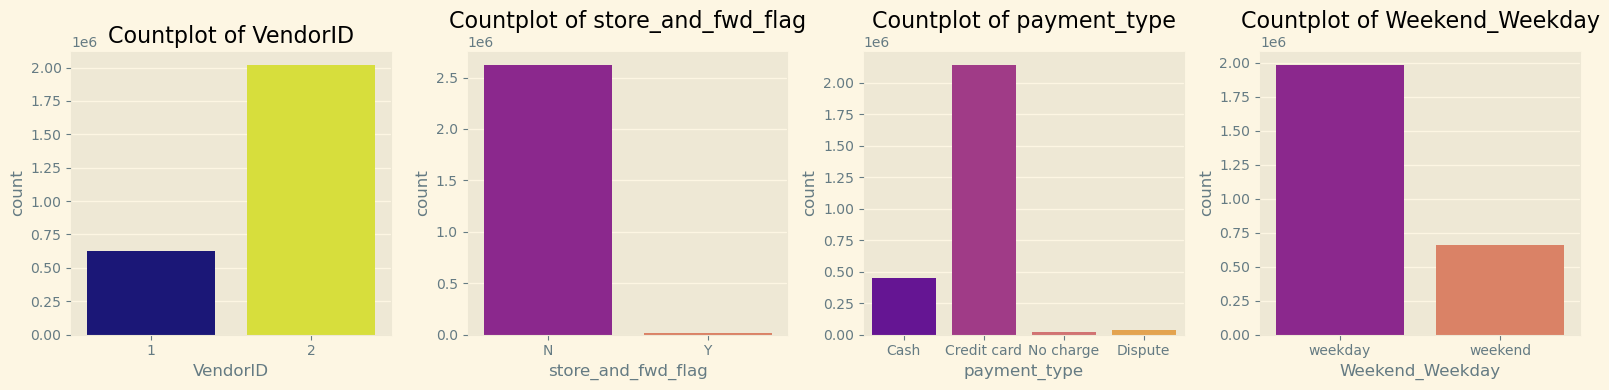

In [14]:
# Create a 1x3 subplot for categorical columns
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

# Plot each categorical column separately
for i, column in enumerate(rnd_cat_cols):
    sns.countplot(x=column, data=df, hue=column, palette='plasma', ax=axes[i], legend=False)
    axes[i].set_title(f'Countplot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

## Pickup Zone, Drop Zone, Time, hour,  Day


In [15]:
tip_amounts_by_time = df.groupby('pickup_time_of_day')['tip_amount'].sum().reset_index()
tip_amounts_by_time

,pickup_time_of_day,tip_amount
0,Afternoon,3593992.00
1,Evening,1297791.37
2,Morning,2784521.51
3,Night,2048419.14


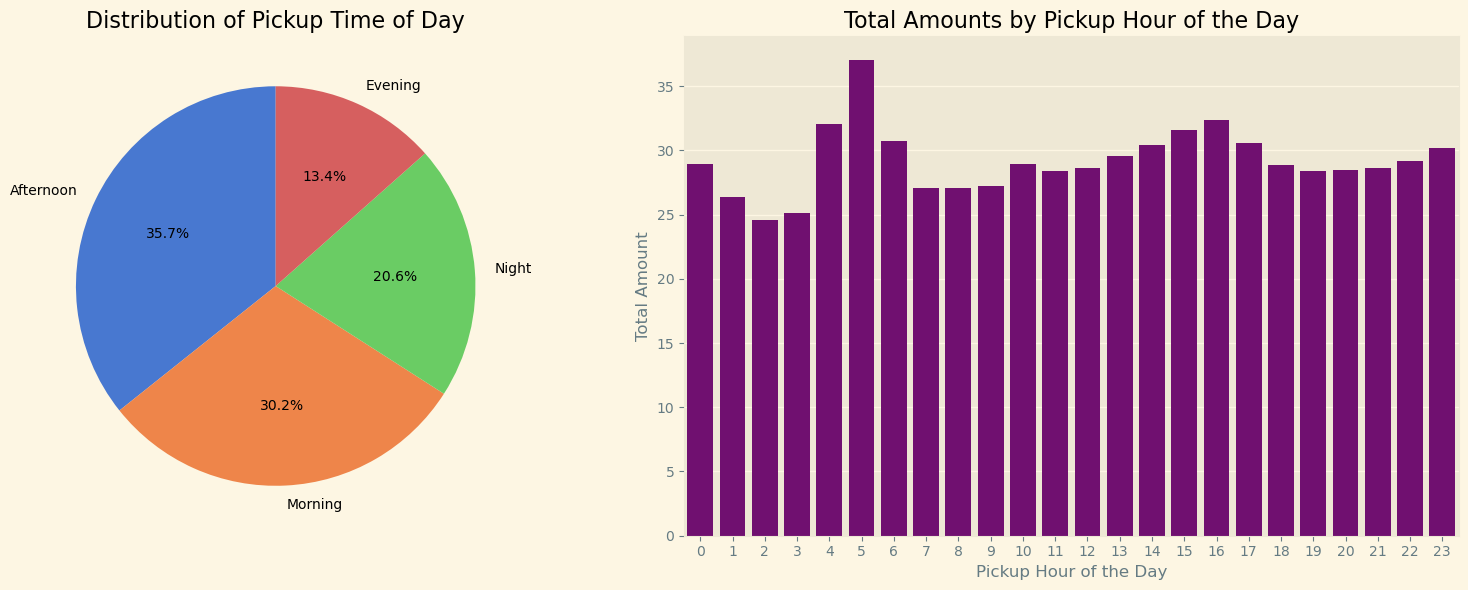

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot pickup_time_of_day as a pie chart
pickup_time_counts = df['pickup_time_of_day'].value_counts()
axes[0].pie(pickup_time_counts, labels=pickup_time_counts.index, 
            autopct='%1.1f%%', startangle=90, colors=sns.color_palette('muted'))
axes[0].set_title('Distribution of Pickup Time of Day')

# Plot tip amounts by pickup_hour_of_day as a bar chart
sns.barplot(x='pickup_hour', y='total_amount', data=df, errorbar=None, color='purple', ax=axes[1])
axes[1].set_title('Total Amounts by Pickup Hour of the Day')
axes[1].set_xlabel('Pickup Hour of the Day')
axes[1].set_ylabel('Total Amount')

# Adjust layout
plt.tight_layout()
plt.show()

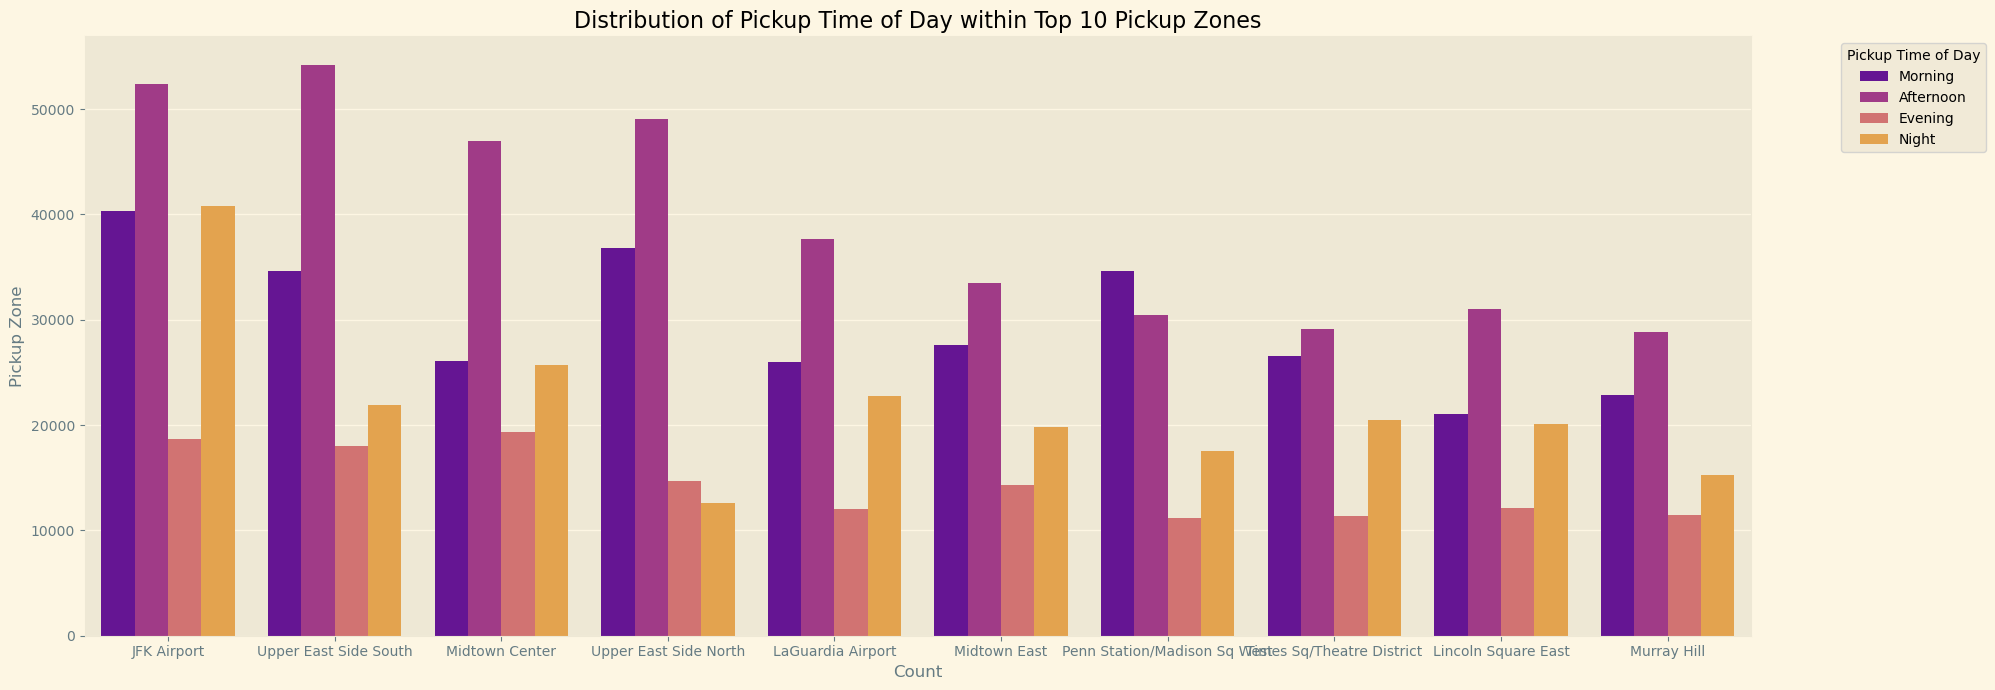

In [17]:
# Get the top pickup zones
top_pickup_zones = df['PickupZone'].value_counts().head(10).index

# Filter the DataFrame for the top pickup zones
top_pickup_zones_df = df[df['PickupZone'].isin(top_pickup_zones)]

# Set up subplots with a specific figsize
fig, ax = plt.subplots(figsize=(20, 7))

# Plot the distribution of pickup_time_of_day within the top 10 pickup zones using countplot
sns.countplot(x='PickupZone', hue='pickup_time_of_day', data=top_pickup_zones_df,
              order=top_pickup_zones, palette='plasma', ax=ax)

plt.title('Distribution of Pickup Time of Day within Top 10 Pickup Zones')
plt.xlabel('Count')
plt.ylabel('Pickup Zone')
plt.legend(title='Pickup Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
top_pickup_zones = df['PickupZone'].value_counts().head(10)
top_drop_zones = df['DropZone'].value_counts().head(10)

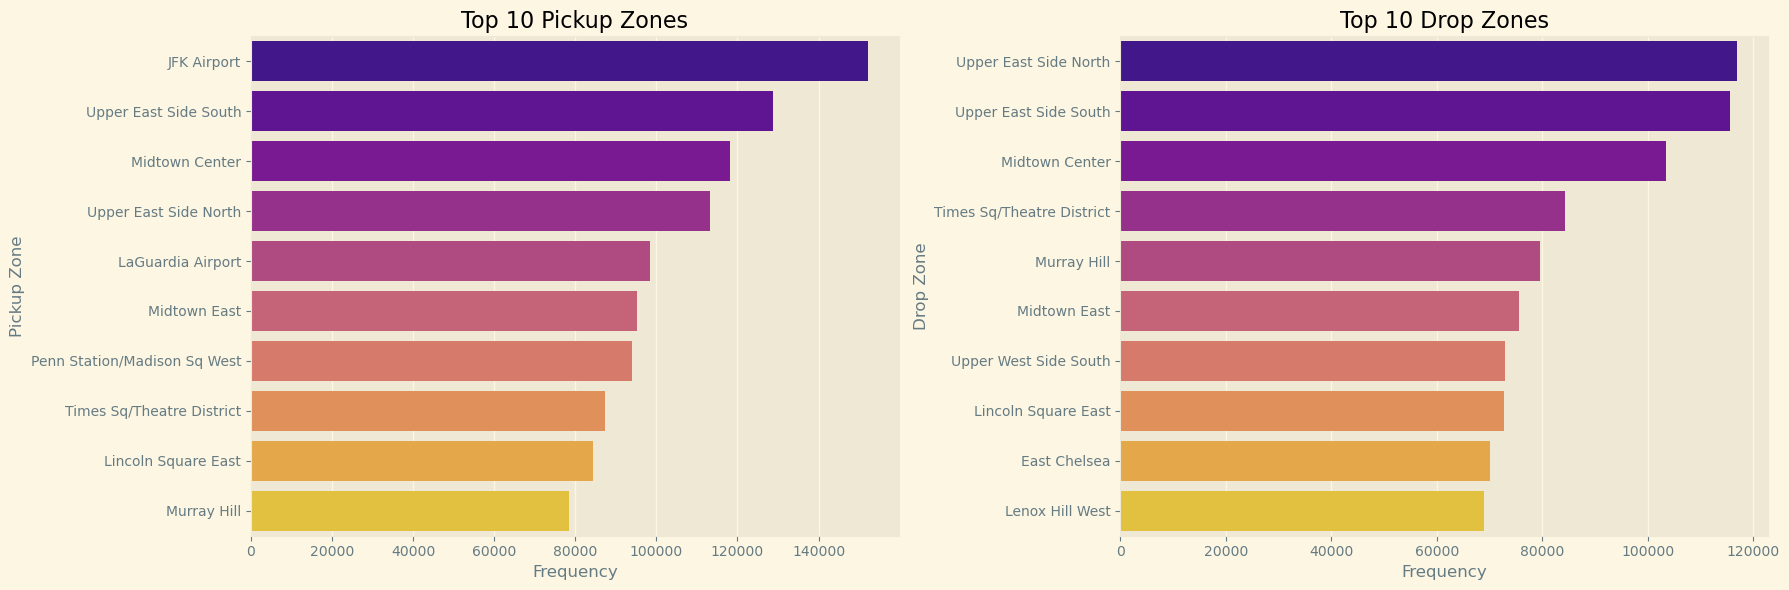

In [19]:
# Set up subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot top pickup zones
sns.barplot(x=top_pickup_zones.values, y=top_pickup_zones.index, 
            ax=axes[0], hue=top_drop_zones.index, palette='plasma', legend=False)
axes[1].set_title('Top 10 Drop Zones')
axes[0].set_title('Top 10 Pickup Zones')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Pickup Zone')

# Plot top drop zones
sns.barplot(x=top_drop_zones.values, y=top_drop_zones.index, 
            ax=axes[1], hue=top_drop_zones.index, palette='plasma', legend=False)
axes[1].set_title('Top 10 Drop Zones')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Drop Zone')

# Adjust layout
plt.tight_layout()
plt.show()

##  Trip Counts

In [20]:
# Group by 'pickup_date' and count the number of trips for each date
trip_counts = df.groupby('pickup_date').size()

#Group by 'pickup_date' and calculate total amounts
total_amounts = df.groupby('pickup_date')['total_amount'].sum()

#Group by 'pickup_date' and calculate total tip amounts
tip_amounts = df.groupby('pickup_date')['tip_amount'].sum()


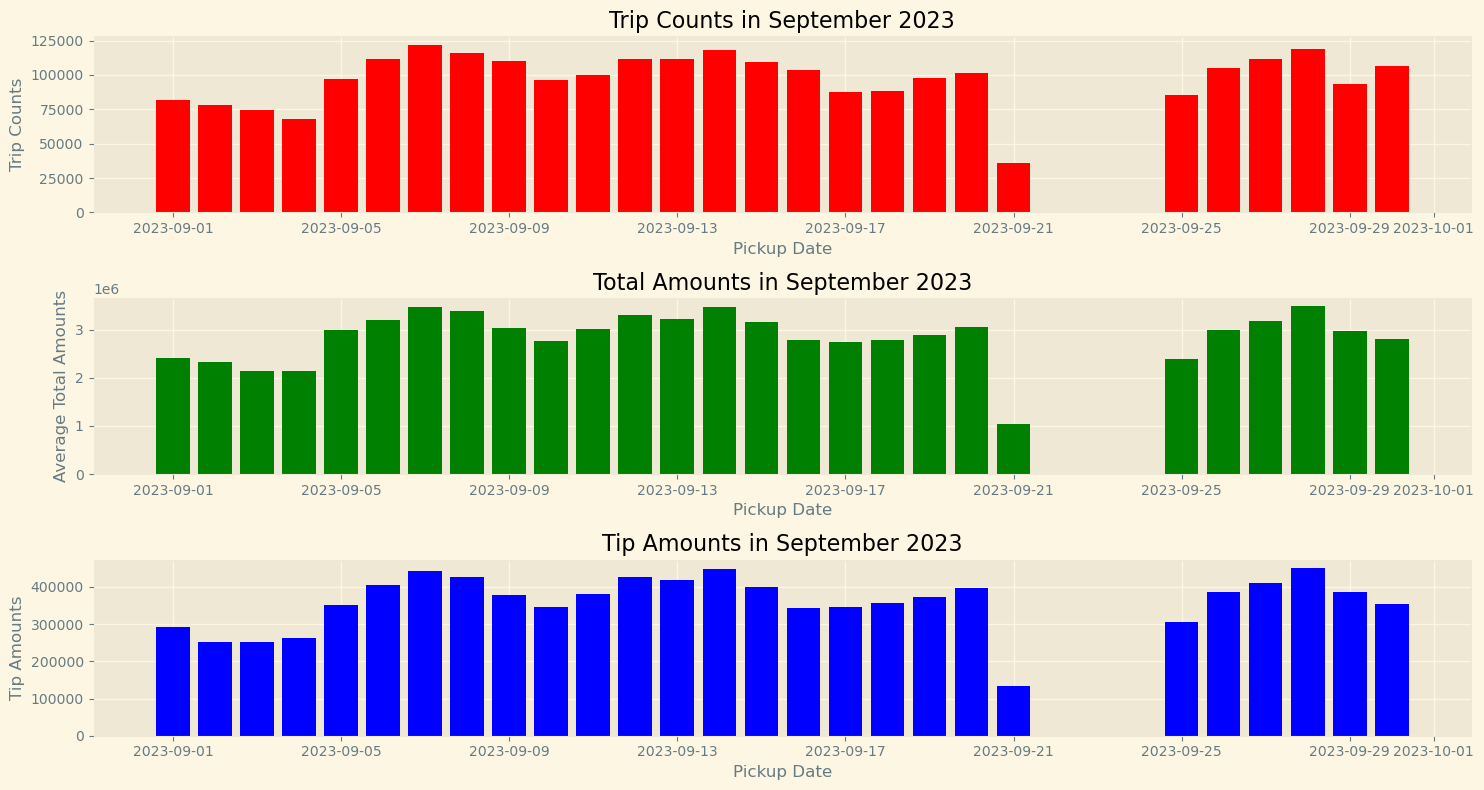

In [21]:
# Plotting the results
plt.figure(figsize=(15, 8))

# Plotting trip counts as bars
plt.subplot(3, 1, 1)
plt.bar(trip_counts.index, trip_counts.values, color='r')
plt.title('Trip Counts in September 2023')
plt.xlabel('Pickup Date')
plt.ylabel('Trip Counts')

# Plotting total amounts as bars
plt.subplot(3, 1, 2)
plt.bar(total_amounts.index, total_amounts.values, color='g')
plt.title('Total Amounts in September 2023')
plt.xlabel('Pickup Date')
plt.ylabel('Average Total Amounts')

# Plotting tip amounts as bars
plt.subplot(3, 1, 3)
plt.bar(tip_amounts.index, tip_amounts.values, color='b')
plt.title('Tip Amounts in September 2023')
plt.xlabel('Pickup Date')
plt.ylabel('Tip Amounts')

plt.tight_layout()
plt.show()

In [22]:
# Group by 'day_of_week' and count the number of trips for each day
trip_counts = df.groupby('Day').size()

# Group by 'day_of_week' and sum total amounts for each day
total_amounts = df.groupby('Day')['total_amount'].sum()

# Group by 'day_of_week' and sum tip amounts for each day
tip_amounts = df.groupby('Day')['tip_amount'].sum()

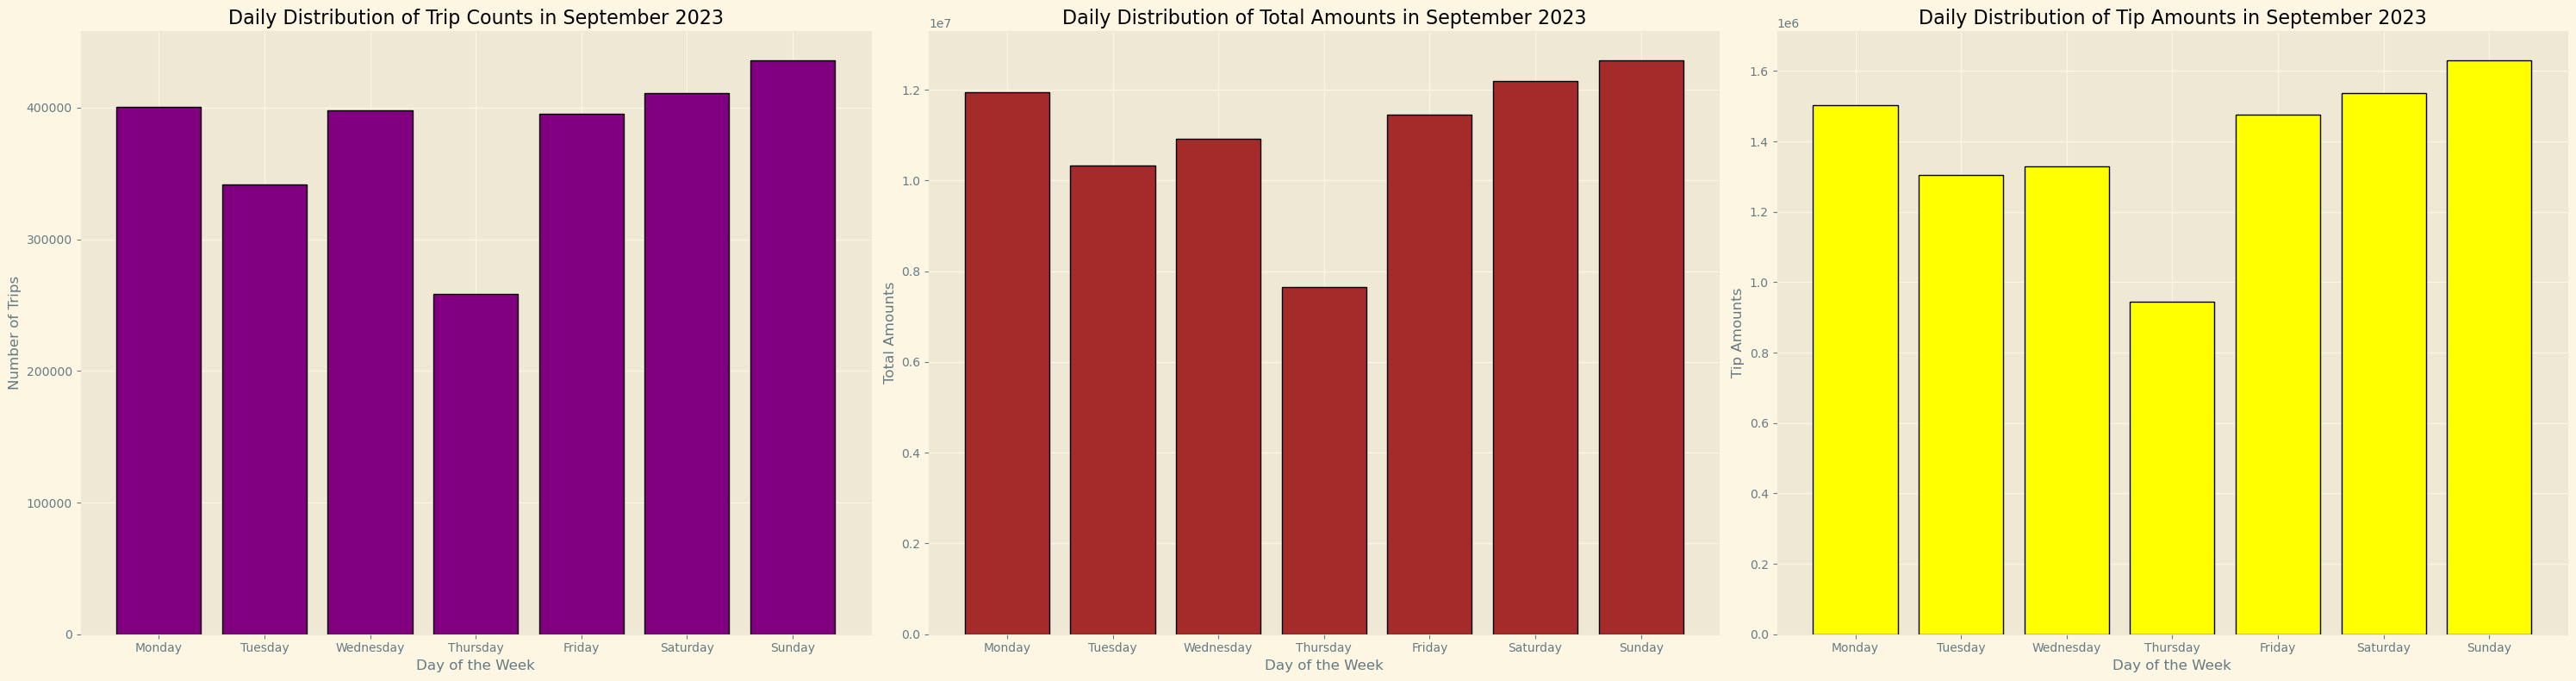

In [23]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 8))

# Bar plot for trip counts
axes[0].bar(range(7), trip_counts, color='purple', edgecolor='black')
axes[0].set_title('Daily Distribution of Trip Counts in September 2023')
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Number of Trips')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Bar plot for total amounts
axes[1].bar(range(7), total_amounts, color='brown', edgecolor='black')
axes[1].set_title('Daily Distribution of Total Amounts in September 2023')
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Total Amounts')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Bar plot for tip amounts
axes[2].bar(range(7), tip_amounts, color='yellow', edgecolor='black')
axes[2].set_title('Daily Distribution of Tip Amounts in September 2023')
axes[2].set_xlabel('Day of the Week')
axes[2].set_ylabel('Tip Amounts')
axes[2].set_xticks(range(7))
axes[2].set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.tight_layout()
plt.show()

## Passenger Counts, Weekdays/Weekend, RatecodeID

In [24]:
# Calculate the average total amount for each passenger count
Total_count = df.groupby('RatecodeID')['passenger_count'].sum().reset_index()
Total_count

,RatecodeID,passenger_count
0,Group ride,3.0
1,JFK,171714.0
2,Nassau or Westchester,912.0
3,Negotiated fare,20166.0
4,Newark,14361.0
5,Standard rate,3380469.0


In [25]:
# Calculate the average trip distance for each passenger count
average_distance_by_passenger_count = df.groupby('passenger_count')['trip_distance'].mean().reset_index()

# Calculate the average total amount for each passenger count
TotalAvg_count = df.groupby('passenger_count')['total_amount'].median().reset_index()

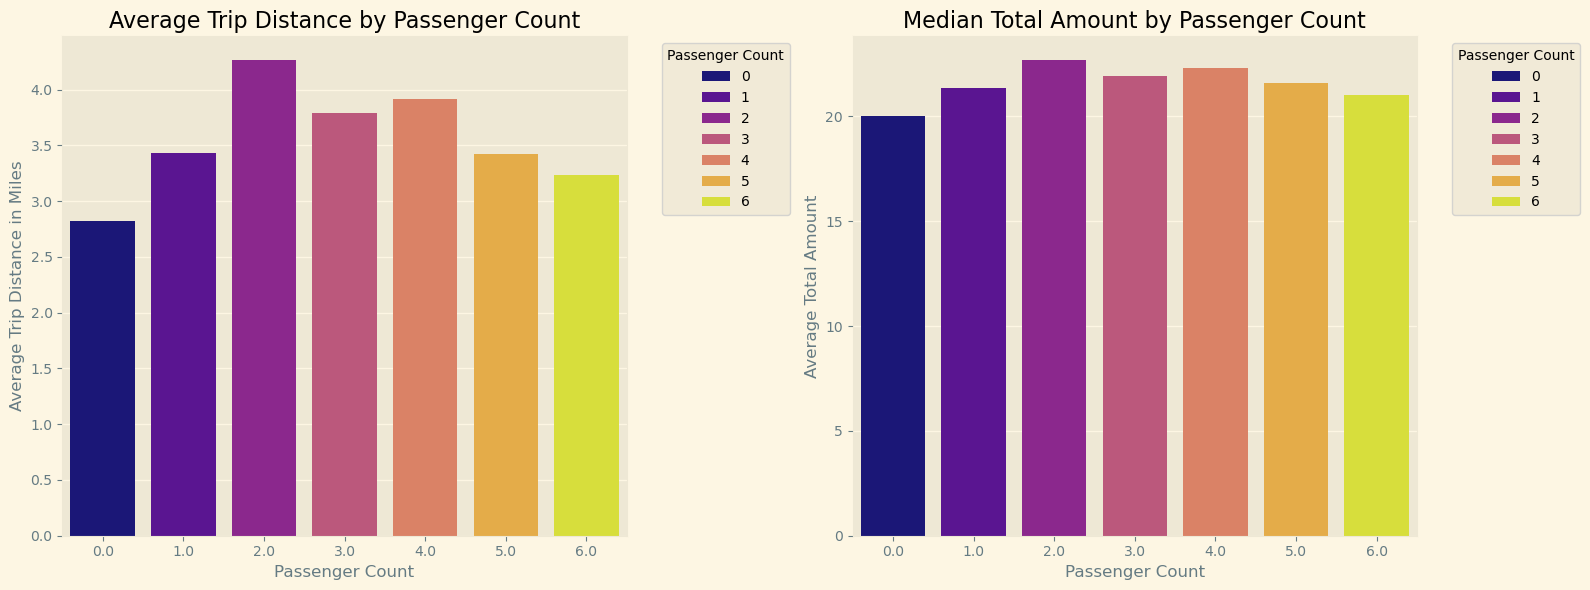

In [26]:
# Set up subplots with 1 row and 2 columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Bar plot of average trip distance by passenger count
sns.barplot(x='passenger_count', y='trip_distance', data=average_distance_by_passenger_count, hue='passenger_count', palette='plasma', dodge=False, ax=axes[0])
axes[0].set_title('Average Trip Distance by Passenger Count')
axes[0].set_xlabel('Passenger Count')
axes[0].set_ylabel('Average Trip Distance in Miles')
axes[0].legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')


# Bar plot of average total amount for each passenger count
sns.barplot(x='passenger_count', y='total_amount', data=TotalAvg_count, hue='passenger_count', palette='plasma', dodge=False, ax=axes[1])
axes[1].set_title('Median Total Amount by Passenger Count')
axes[1].set_xlabel('Passenger Count')
axes[1].set_ylabel('Average Total Amount')
axes[1].legend(title='Passenger Count', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout
plt.tight_layout()
plt.show()

## Scatter plot for columns with numerical data types aganist Passenger count 

In [27]:
num_col = df.select_dtypes(include=np.number)
cat_col = df.select_dtypes(exclude=np.number)
num_col.sample(3)

,VendorID,pickup_hour,dropoff_hour,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,travel_time_mins
2506994,2,2,3,1.0,1.41,9.3,0.00,0.00,11.80,0.0,0.00,6.750000
703359,2,14,14,2.0,4.00,21.2,6.30,0.00,31.50,2.5,0.00,18.916667
2647091,2,14,14,2.0,7.82,31.0,8.89,6.94,55.08,0.0,1.75,16.083333


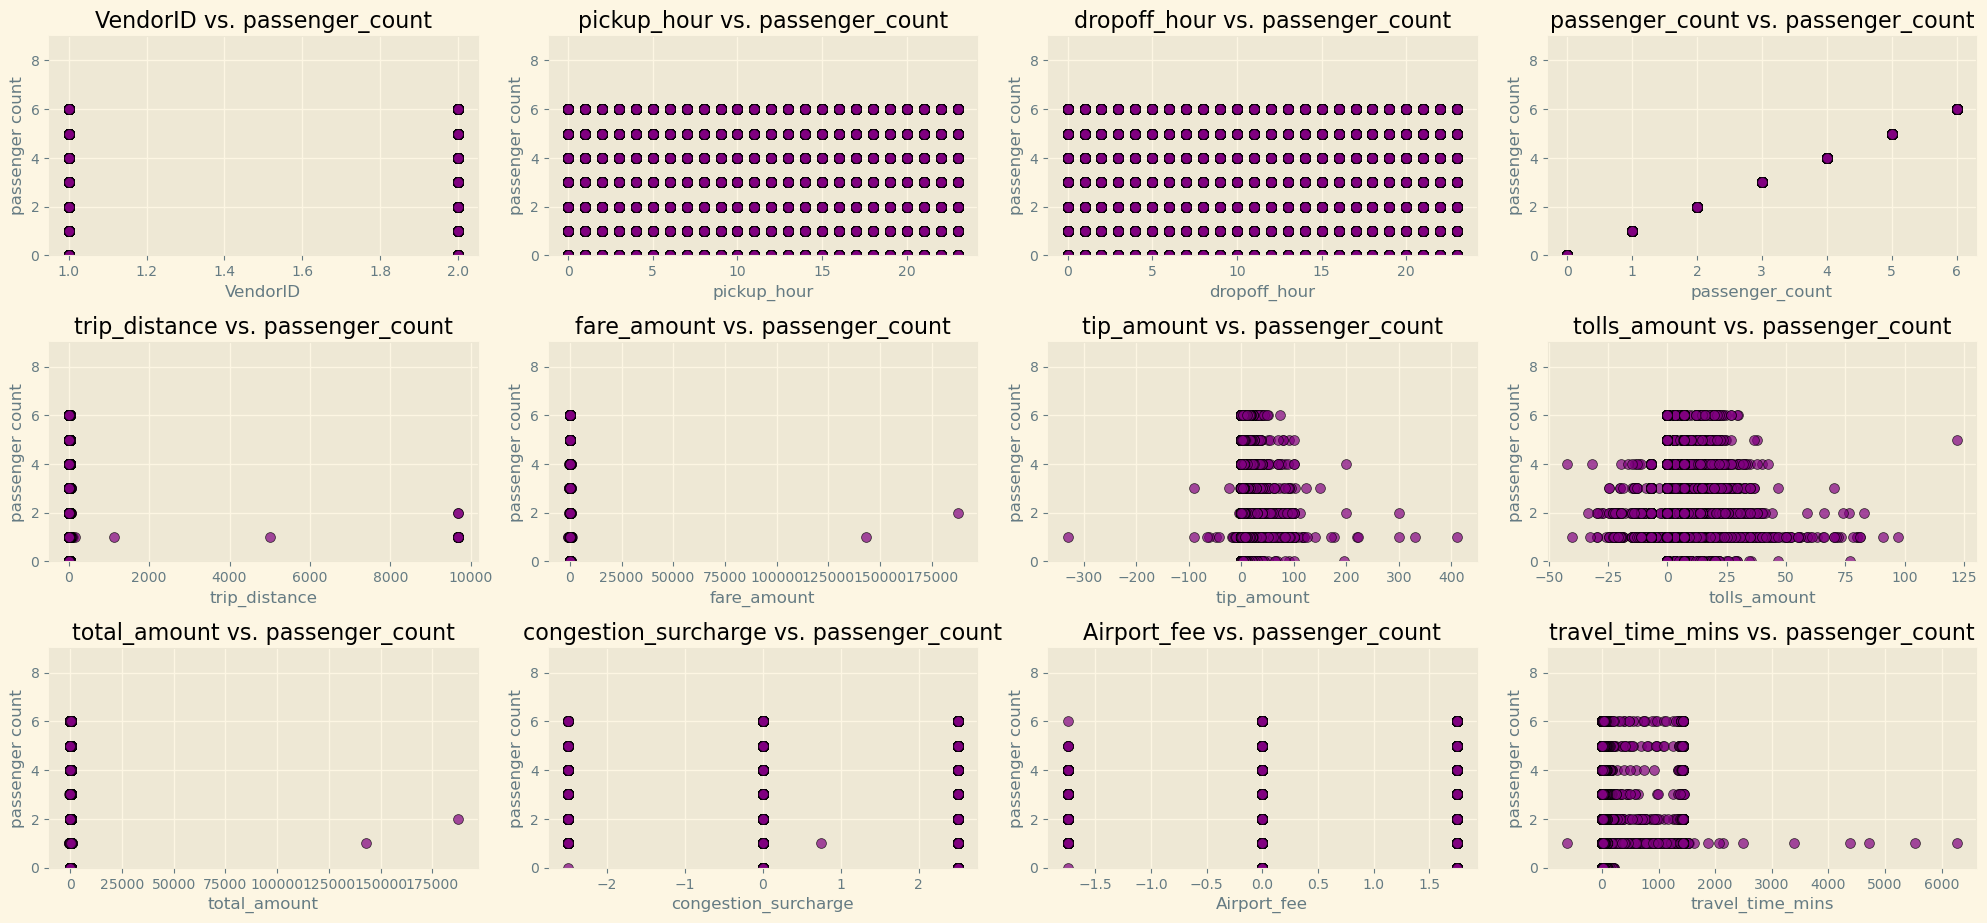

In [28]:
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_col, 1):
    plt.subplot(5, 4, i)
    sns.scatterplot(x=col, y='passenger_count', data=df, color='purple', alpha=0.7, edgecolor='black', s=50)
    plt.title(f'{col} vs. passenger_count')
    plt.xlabel(col)
    plt.ylabel('passenger count')
    plt.ylim(0, 9)  # Set y-axis limit for better readability

plt.tight_layout()
plt.show()

## Correlation 

In [29]:
df.describe()

,VendorID,pickup_date,pickup_hour,dropoff_date,dropoff_hour,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,travel_time_mins
count,2.641589e+06,2641589,2.641589e+06,2641589,2.641589e+06,2.641589e+06,2.641589e+06,2.641589e+06,2.641589e+06,2.641589e+06,2.641589e+06,2.641589e+06,2.641589e+06,2.641589e+06
mean,1.764303e+00,2023-09-14 21:01:41.969988864,1.426682e+01,2023-09-14 21:16:40.512796928,1.432434e+01,1.358131e+00,3.567842e+00,1.999420e+01,3.681392e+00,6.054973e-01,2.921421e+01,2.280506e+00,1.634073e-01,1.842916e+01
min,1.000000e+00,2023-09-01 00:00:00,0.000000e+00,2023-09-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,-8.700000e+02,-3.308800e+02,-4.225000e+01,-8.727500e+02,-2.500000e+00,-1.750000e+00,-6.170833e+02
25%,2.000000e+00,2023-09-08 00:00:00,1.000000e+01,2023-09-08 00:00:00,1.100000e+01,1.000000e+00,1.030000e+00,9.300000e+00,1.000000e+00,0.000000e+00,1.600000e+01,2.500000e+00,0.000000e+00,7.916667e+00
50%,2.000000e+00,2023-09-14 00:00:00,1.500000e+01,2023-09-14 00:00:00,1.500000e+01,1.000000e+00,1.760000e+00,1.420000e+01,2.940000e+00,0.000000e+00,2.148000e+01,2.500000e+00,0.000000e+00,1.331667e+01
75%,2.000000e+00,2023-09-20 00:00:00,1.900000e+01,2023-09-20 00:00:00,1.900000e+01,1.000000e+00,3.390000e+00,2.330000e+01,4.620000e+00,0.000000e+00,3.200000e+01,2.500000e+00,0.000000e+00,2.221667e+01
max,2.000000e+00,2023-09-30 00:00:00,2.300000e+01,2023-10-02 00:00:00,2.300000e+01,6.000000e+00,9.683150e+03,1.875030e+05,4.111000e+02,1.218300e+02,1.875139e+05,2.500000e+00,1.750000e+00,6.266383e+03
std,4.244336e-01,NaN,5.784953e+00,NaN,5.906073e+00,8.802708e-01,3.410775e+01,1.462760e+02,4.134558e+00,2.181656e+00,1.469949e+02,7.805024e-01,5.190716e-01,3.859384e+01


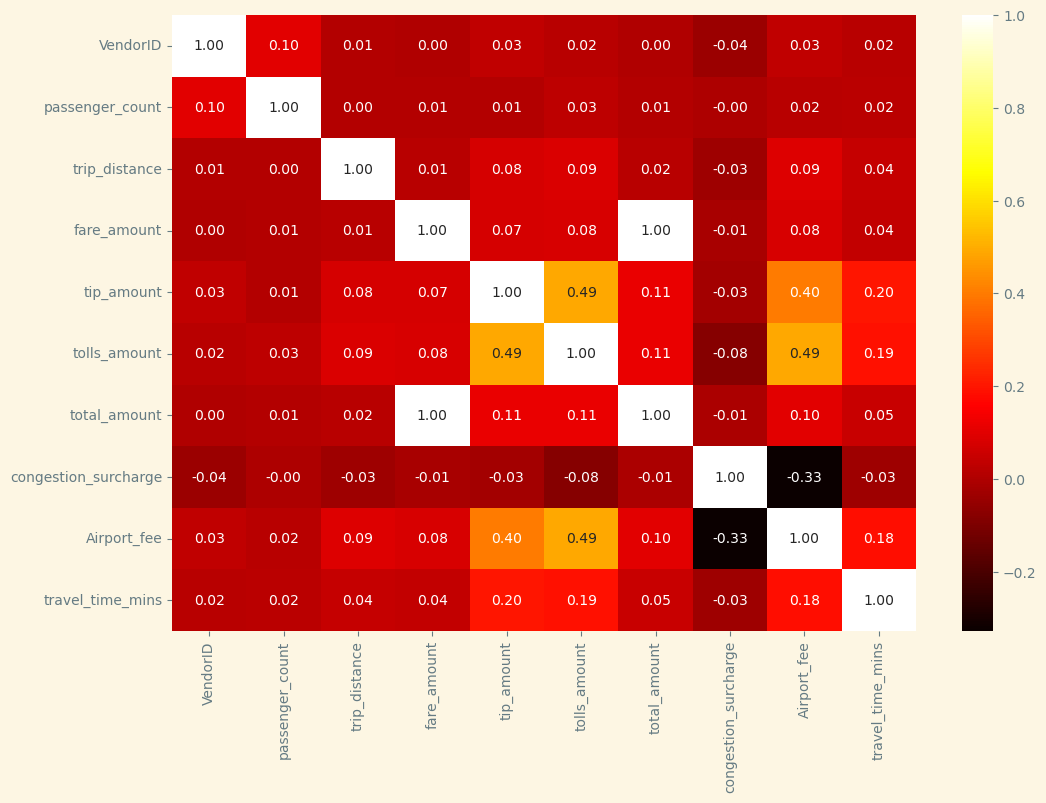

In [30]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='hot', fmt=".2f")
plt.show()

In [31]:
corr

,VendorID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,travel_time_mins
VendorID,1.000000,0.099871,0.006899,0.002159,0.031365,0.019130,0.003247,-0.039919,0.033303,0.016700
passenger_count,0.099871,1.000000,0.004262,0.005421,0.007982,0.029205,0.006071,-0.002716,0.019159,0.023782
trip_distance,0.006899,0.004262,1.000000,0.014648,0.075428,0.085699,0.018459,-0.033716,0.088483,0.040654
fare_amount,0.002159,0.005421,0.014648,1.000000,0.074914,0.081040,0.999016,-0.012518,0.076804,0.038847
tip_amount,0.031365,0.007982,0.075428,0.074914,1.000000,0.487153,0.114088,-0.027084,0.403008,0.195994
tolls_amount,0.019130,0.029205,0.085699,0.081040,0.487153,1.000000,0.113983,-0.079182,0.490429,0.185734
total_amount,0.003247,0.006071,0.018459,0.999016,0.114088,0.113983,1.000000,-0.009382,0.101407,0.048243
congestion_surcharge,-0.039919,-0.002716,-0.033716,-0.012518,-0.027084,-0.079182,-0.009382,1.000000,-0.328078,-0.034879
Airport_fee,0.033303,0.019159,0.088483,0.076804,0.403008,0.490429,0.101407,-0.328078,1.000000,0.180884
travel_time_mins,0.016700,0.023782,0.040654,0.038847,0.195994,0.185734,0.048243,-0.034879,0.180884,1.000000


# Feature Scaling

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

In [33]:
df1 = df.copy()

drop_col = ['pickup_date', 'pickup_time', 'dropoff_date', 'dropoff_time']

df1 = df1.drop(drop_col, axis=1)
# Sample a fraction of the data
df1 = df1.sample(frac=0.1, random_state=42)
df1.shape

(264159, 20)

In [34]:
categorical_features = df1[['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type', 
                            'PickupZone', 'DropZone', 'pickup_time_of_day', 'Day', 'Weekend_Weekday']]

df1 = df1.drop(categorical_features, axis=1)

numeric_features = df1[['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 
                        'tolls_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'travel_time_mins']]
numeric_features.head(3)

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,travel_time_mins
8012,1.0,1.90,10.0,2.80,0.0,16.80,2.5,0.0,8.250000
2607113,1.0,1.12,8.6,2.72,0.0,16.32,2.5,0.0,6.683333
502633,1.0,0.89,15.6,4.12,0.0,24.72,2.5,0.0,17.333333


## Clustering 

In [35]:
# Extract numerical features
numeric_features = df1[['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 
                        'tolls_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'travel_time_mins']]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
scaled_features = scaler.fit_transform(numeric_features)
# Replace the original features with the scaled features
scaled_features.shape

(264159, 9)

In [36]:
# Determine the optimal number of clusters using the elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

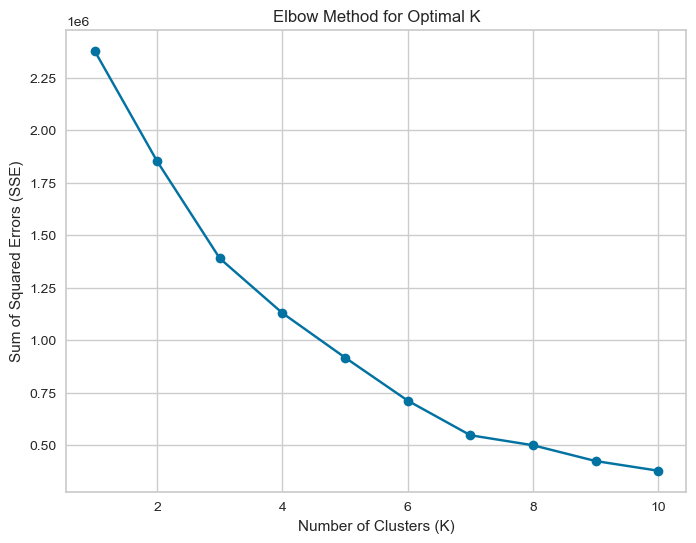

In [37]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [38]:
# Apply K-means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=7, random_state=42,n_init=10)
df1['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate clustering using silhouette score
silhouette_avg = silhouette_score(scaled_features, df1['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

In [39]:
# Analyze the characteristics of each cluster
cluster_sum = df1.groupby('Cluster')[['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount', 
                        'tolls_amount', 'total_amount', 'congestion_surcharge', 'Airport_fee', 'travel_time_mins']].mean()
cluster_sum

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,congestion_surcharge,Airport_fee,travel_time_mins
Cluster,,,,,,,,,
0,1.139571,2.191538,15.503456,2.917833,0.045155,23.266435,2.496430,0.002970,14.728141
1,2.000000,21.300000,187502.960000,0.000000,6.940000,187513.900000,2.500000,0.000000,57.000000
2,1.287625,6.713129,28.199111,3.413965,0.309069,35.040141,-0.314799,0.909434,21.341216
3,1.853261,3.628098,22.539130,2.505870,0.688641,30.573859,2.323370,0.095109,1408.422917
4,1.000000,9675.255000,20.325000,4.925000,0.000000,31.562500,1.875000,0.437500,17.875000
5,4.008886,2.520911,16.982295,2.883234,0.150744,24.771320,2.448791,0.017267,15.421161
6,1.397585,13.996277,59.242400,12.264474,6.877441,86.325477,2.236537,1.237213,44.181515


- Cluster 0: Short Trippers:

Characteristics: Low passenger count, short trip distance, moderate fare amount, moderate tip amount, minimal tolls, moderate total amount, congestion surcharge present.

- Cluster 1: Long Haul Giants:

Characteristics: High passenger count, very long trip distance, exceptionally high fare amount, no tip, high tolls, extremely high total amount, standard congestion surcharge.

- Cluster 2: City Explorers:

Characteristics: Moderate passenger count, medium trip distance, reasonable fare amount, moderate tip amount, low tolls, moderate total amount, negative congestion surcharge, airport fee present.

- Cluster 3: Urban Adventurers:

Characteristics: High passenger count, short to medium trip distance, high fare amount, moderate tip amount, moderate tolls, high total amount, positive congestion surcharge, longer travel time.

- Cluster 4: Outliers' Odyssey:

Characteristics: Single passenger, extremely long trip distance, low fare amount, high tip amount, no tolls, moderate total amount, standard congestion surcharge.

- Cluster 5: Family Journeys:

Characteristics: Higher passenger count, short trip distance, moderate fare amount, moderate tip amount, minimal tolls, moderate total amount, congestion surcharge present.

- Cluster 6: Luxury Ventures:

Characteristics: Moderate passenger count, long trip distance, high fare amount, very high tip amount, high tolls, very high total amount, moderate congestion surcharge, extended travel time.

## Modelling

### Model 1 using xgboost

In [40]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Split the data into features and target
X = df1.drop(['total_amount', 'Cluster'], axis=1)  # Features
y = df1['total_amount']  # Target

# Split the data into training and testing sets
# Initial Model
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42)
initial_model_xgb = xgb.XGBRegressor(random_state=42)
initial_model_xgb.fit(X_train_xgb, y_train_xgb)
initial_y_pred_xgb = initial_model_xgb.predict(X_test_xgb)
initial_mse_xgb = mean_squared_error(y_test_xgb, initial_y_pred_xgb)

print(f'Initial XGBoost Model Mean Squared Error: {initial_mse_xgb}')

Initial XGBoost Model Mean Squared Error: 6.464187279137096


In [41]:
# Iterative Refinement and Hyperparameter Tuning
param_grid_xgb = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

grid_search_xgb = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid_xgb, cv=5)
grid_search_xgb.fit(X_train_xgb, y_train_xgb)
best_params_xgb = grid_search_xgb.best_params_

# Refit the XGBoost model with the best hyperparameters
best_model_xgb = xgb.XGBRegressor(**best_params_xgb, random_state=42)
best_model_xgb.fit(X_train_xgb, y_train_xgb)
best_y_pred_xgb = best_model_xgb.predict(X_test_xgb)
best_mse_xgb = mean_squared_error(y_test_xgb, best_y_pred_xgb)

print(f'Best XGBoost Model Mean Squared Error: {best_mse_xgb}')
print(f'Best XGBoost Hyperparameters: {best_params_xgb}')

Best XGBoost Model Mean Squared Error: 6.751055588050534
Best XGBoost Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


In [42]:
# Use the best trained XGBoost model to make predictions on the test set
test_predictions = best_model_xgb.predict(X_test_xgb)

df1['Predicted_Total_Amount'] = best_model_xgb.predict(X)

# Print or use the predictions as needed
print(f'Test Set Predictions: {test_predictions}')

Test Set Predictions: [12.294334 19.454353 15.632577 ... 20.560776 62.706738 24.64737 ]


XGBoost Regression Model Documentation

This script demonstrates the process of training an XGBoost regression model
for predicting the 'total_amount' based on input features in a DataFrame.

1. Data Preparation:
   - Features: Extracted from DataFrame excluding 'total_amount' and 'Cluster'.
   - Target: 'total_amount'.

2. Initial Model Training:
   - Split the data into training and testing sets (80% train, 20% test).
   - Train an initial XGBoost model with default hyperparameters.
   - Evaluate the initial model's performance using Mean Squared Error (MSE).

3. Iterative Refinement and Hyperparameter Tuning:
   - Define a grid of hyperparameters for tuning (n_estimators, max_depth, learning_rate).
   - Perform a Grid Search Cross-Validation to find the best hyperparameters.
   - Refit the XGBoost model with the best hyperparameters.
   - Evaluate the refined model's performance using MSE.

4. Prediction and Usage:
   - Use the best trained XGBoost model to make predictions on the test set.
   - Add the predicted values to the original DataFrame as 'Predicted_Total_Amount'.
   - Print or use the test set predictions as needed.

Note: Make sure to have the required libraries installed before running the script.

### Model 2 using RandomForestRegressor

In [43]:
# Split the data into features and target
X = df1.drop(['passenger_count', 'Cluster'], axis=1)  # Features
y = df1['passenger_count']  # Target

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
# Step 2: Model Building (Choose a Model)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [45]:
# Model Interpretation
feature_importances = model.feature_importances_

# Step 3: Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5548821886100571


Random Forest Regression Model Documentation

This script demonstrates the process of training a Random Forest regression model
for predicting 'passenger_count' based on input features in a DataFrame.

1. Data Preparation:
   - Features: Extracted from DataFrame excluding 'passenger_count' and 'Cluster'.
   - Target: 'passenger_count'.

2. Step 1: Split the Data into Training and Testing Sets:
   - Use the train_test_split function to create training and testing sets (80% train, 20% test).

3. Step 2: Model Building (Random Forest Regression):
   - Choose a regression model (Random Forest in this case).
   - Initialize the model with hyperparameters (e.g., n_estimators=100, random_state=42).
   - Train the model using the training set.

4. Step 3: Model Interpretation:
   - Obtain feature importances to understand the contribution of each feature to the predictions.

5. Step 4: Model Evaluation:
   - Use the trained model to make predictions on the test set.
   - Calculate the Mean Squared Error (MSE) to quantify the model's performance.

Note: Ensure that the required libraries (e.g., RandomForestRegressor, train_test_split, mean_squared_error)
are installed before running the script.